In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# data loading
df = pd.read_csv(r"C:\Users\adria\Documents\GitHub\project-1-ironhack-payments-en\project_dataset\extract - cash request - data analyst.csv")

In [4]:

#df.info()

#DATA EXPLORATION

#  overview of the dataset's structure
print(df.info())

# Check for any missing values
print(df.isnull().sum())

# Get summary statistics for numerical columns
print(df.describe())


# Check for missing values in the DataFrame
missing_values = pd.isnull(df)

# Count missing values in each column
missing_counts = missing_values.sum()

# Count columns with missing values
columns_with_missing = missing_counts[missing_counts > 0].count()

# Check if all columns have missing values
all_columns_missing = missing_counts.all()

# Calculate the total number of missing values
total_missing_values = missing_counts.sum()

# Display the results
print("Missing Values in Each Column:", missing_counts)
print("Number of Columns with Missing Values:", columns_with_missing)
print("All Columns Have Missing Values:", all_columns_missing)

# Drop rows with missing values in the 'user_id' column, as those are ishe deleted accounts, approx 10% of all data, we will not be using deleted accounts for analysy
df.dropna(subset=['user_id'], inplace=True)

# Replace NaN values with 0
df.fillna(0, inplace=True)


# Convert 'created_at' column to datetime format
df['created_at'] = pd.to_datetime(df['created_at'])

# Extract year, month, and day into separate columns
df['year'] = df['created_at'].dt.year
df['month'] = df['created_at'].dt.month
#df['day'] = df['created_at'].dt.day

# Concatenate year, month,olumns into a single string column
df['full_date_str'] = df['year'].astype(str) + '-' + df['month'].astype(str)

# Convert the concatenated string column to datetime format
df['cohort'] = pd.to_datetime(df['full_date_str'], format='%Y-%m')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23970 entries, 0 to 23969
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          23970 non-null  int64  
 1   amount                      23970 non-null  float64
 2   status                      23970 non-null  object 
 3   created_at                  23970 non-null  object 
 4   updated_at                  23970 non-null  object 
 5   user_id                     21867 non-null  float64
 6   moderated_at                16035 non-null  object 
 7   deleted_account_id          2104 non-null   float64
 8   reimbursement_date          23970 non-null  object 
 9   cash_request_received_date  16289 non-null  object 
 10  money_back_date             16543 non-null  object 
 11  transfer_type               23970 non-null  object 
 12  send_at                     16641 non-null  object 
 13  recovery_status             333

In [5]:
# data loading
df_fees = pd.read_csv(r"C:\Users\adria\Documents\GitHub\project-1-ironhack-payments-en\project_dataset\extract - fees - data analyst - .csv")
#df.info()


#DATA EXPLORATION

#  overview of the dataset's structure
print(df_fees.info())

# Check for any missing values
print(df_fees.isnull().sum())

# Get summary statistics for numerical columns
print(df_fees.describe())

data_shape = df_fees.shape
print(f"\nShape of the DataFrame: {data_shape}")

# Column names
column_names = df_fees.columns
print(f"\nColumn Names: {column_names}")

# Data types of each column
data_types = df_fees.dtypes
print(f"\nData Types:\n{data_types}")

# Convert 'created_at' column to datetime format
df_fees['created_at'] = pd.to_datetime(df_fees['created_at'])

# Extract year, month, and day into separate columns
df_fees['year'] = df_fees['created_at'].dt.year
df_fees['month'] = df_fees['created_at'].dt.month
#df['day'] = df['created_at'].dt.day

# Concatenate year, month,olumns into a single string column
df_fees['full_date_str_created_at'] = df_fees['year'].astype(str) + '-' + df_fees['month'].astype(str)


# Convert the concatenated string column to datetime format
df_fees['cohort'] = pd.to_datetime(df_fees['full_date_str_created_at'], format='%Y-%m')

# Replace NaN values with 0
df_fees.fillna(0, inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21061 entries, 0 to 21060
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               21061 non-null  int64  
 1   cash_request_id  21057 non-null  float64
 2   type             21061 non-null  object 
 3   status           21061 non-null  object 
 4   category         2196 non-null   object 
 5   total_amount     21061 non-null  float64
 6   reason           21061 non-null  object 
 7   created_at       21061 non-null  object 
 8   updated_at       21061 non-null  object 
 9   paid_at          15531 non-null  object 
 10  from_date        7766 non-null   object 
 11  to_date          7766 non-null   object 
 12  charge_moment    21061 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.1+ MB
None
id                     0
cash_request_id        4
type                   0
status                 0
category           18865
total_am

In [6]:
#JOINING TABLES

# Perform left join
merged_cashrequest_fees = pd.merge(df,df_fees, left_on= "user_id",right_on= "cash_request_id", how='left')

# Display the result
#print(merged_cashrequest_fees)

In [7]:
#Print all column names

print("Column Names:")
for column in merged_cashrequest_fees.columns:
    column
#Left joint created a lot of duplicated columns, could use with deleting them

#The amount of moeny they lend taking into consideration,active,approved,money_send from status_x column

#Filter rows based on conditions in 'status_x' column
filtered_df = merged_cashrequest_fees[merged_cashrequest_fees['status_x'].isin(['active', 'money_sent', 'approved'])]

#Calculate the sum of 'amount' column
total_amount = filtered_df['amount'].sum()

print("Total amount considering only 'active', 'money_sent', or 'approved' status_x:")
print(total_amount)

# Calculate the average of 'amount' column
average_amount = merged_cashrequest_fees['amount'].mean()

print("Average amount:")
print(average_amount)


#group the cohort from created_at_x
#Convert 'created_at_x' column to datetime format
merged_cashrequest_fees['created_at_x'] = pd.to_datetime(merged_cashrequest_fees['created_at_x'])

# Group by month and count occurrences
monthly_counts = merged_cashrequest_fees.groupby(merged_cashrequest_fees['created_at_x'].dt.month).size()

print("Monthly counts:")
print(monthly_counts)

#Count transfer_types

transfer_type_counts = merged_cashrequest_fees['transfer_type'].value_counts()

print("Transfer type counts:")
print(transfer_type_counts)

#Count status_x occurences

status_x_counts = merged_cashrequest_fees['status_x'].value_counts()
print("Status counts:")
print(status_x_counts)

#Count unique values in 'user_id' column
unique_user_count = merged_cashrequest_fees['user_id'].nunique()

print("Number of unique user IDs:")
print(unique_user_count)





Column Names:
Total amount considering only 'active', 'money_sent', or 'approved' status_x:
6205.0
Average amount:
83.41404783771912
Monthly counts:
created_at_x
1      212
2      192
3      242
4      498
5      881
6     2936
7     3761
8     3699
9     4252
10    7980
11     139
12     251
dtype: int64
Transfer type counts:
transfer_type
instant    14322
regular    10721
Name: count, dtype: int64
Status counts:
status_x
money_back               17845
rejected                  6127
direct_debit_rejected      905
active                      70
transaction_declined        48
direct_debit_sent           41
canceled                     7
Name: count, dtype: int64
Number of unique user IDs:
10798


               id_x        amount        user_id  deleted_account_id  \
count  25043.000000  25043.000000   25043.000000        25043.000000   
mean   13781.406820     83.414048   30140.842072            0.010462   
min        3.000000      1.000000      34.000000            0.000000   
25%     7292.500000     50.000000   10374.000000            0.000000   
50%    14009.000000    100.000000   20537.000000            0.000000   
75%    20468.500000    100.000000   41446.500000            0.000000   
max    27010.000000    200.000000  103719.000000          262.000000   
std     7763.121208     26.203851   26679.228566            1.655610   

             year_x       month_x                       cohort_x  \
count  25043.000000  25043.000000                          25043   
mean    2019.989937      8.140518  2020-08-01 14:31:05.048116992   
min     2019.000000      1.000000            2019-11-01 00:00:00   
25%     2020.000000      7.000000            2020-07-01 00:00:00   
50%     202

c:\Users\adria\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


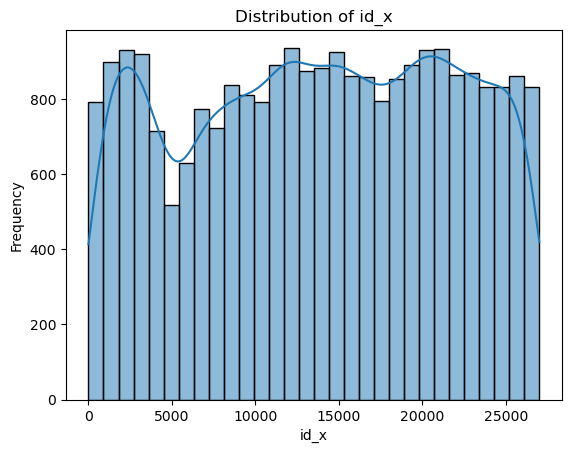

c:\Users\adria\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


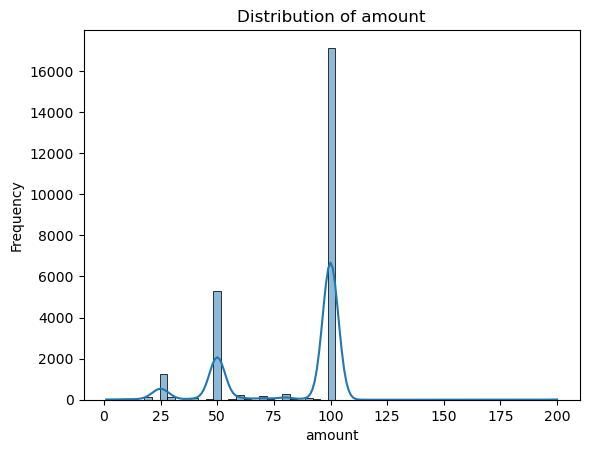

c:\Users\adria\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


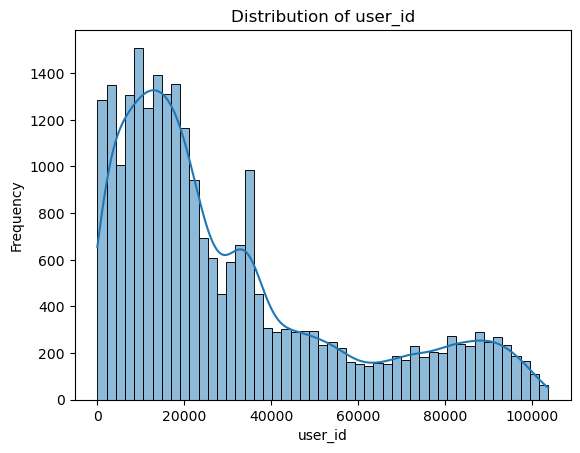

c:\Users\adria\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


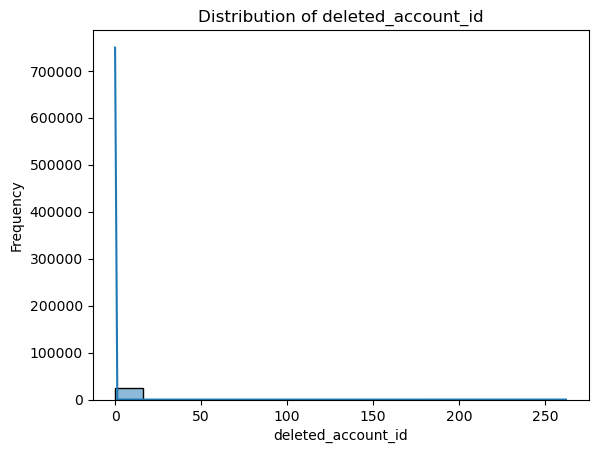

c:\Users\adria\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


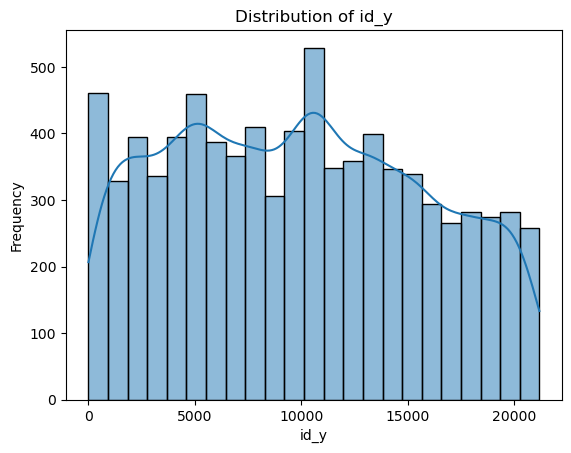

c:\Users\adria\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


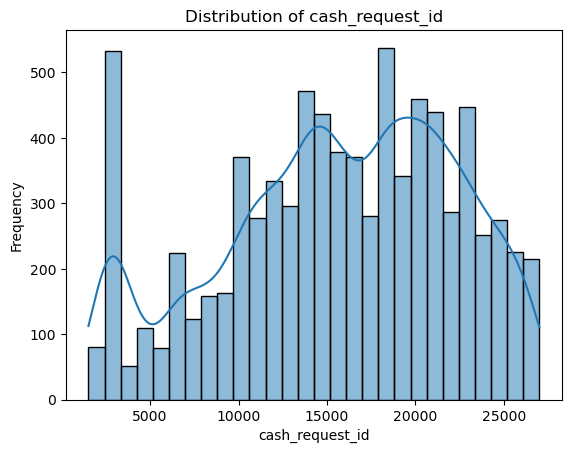

c:\Users\adria\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


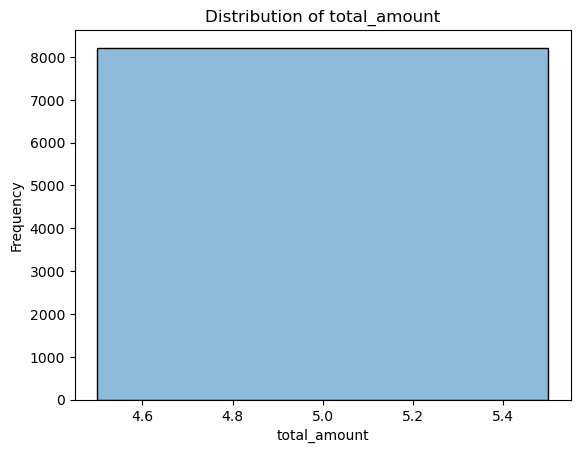

c:\Users\adria\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


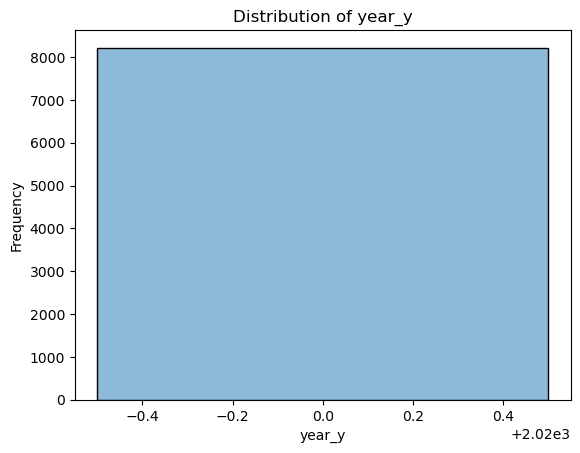

c:\Users\adria\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


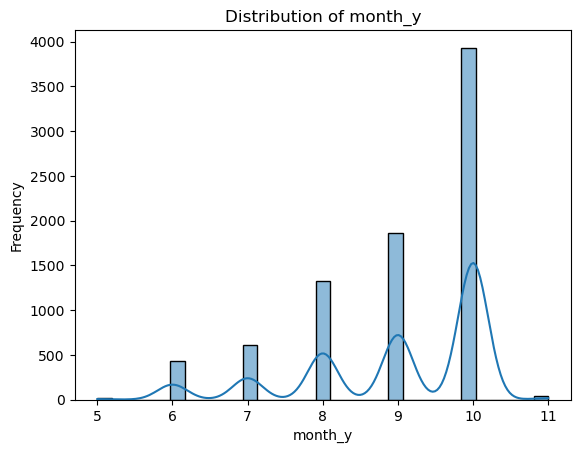

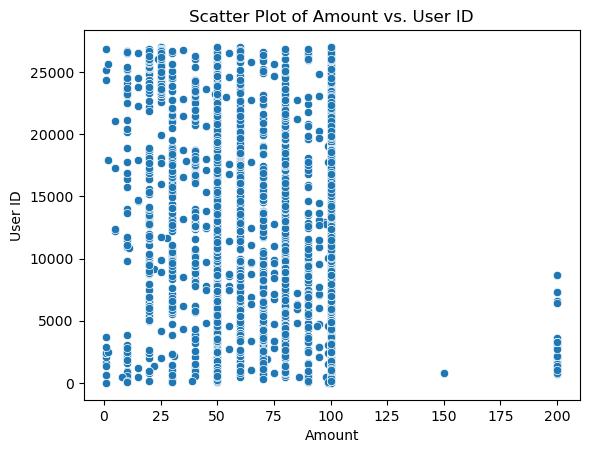

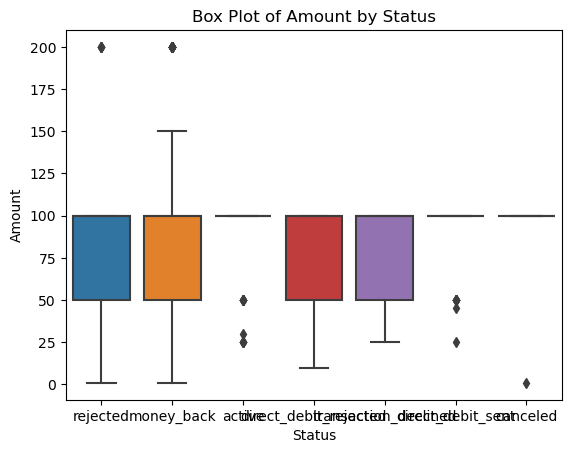

c:\Users\adria\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\adria\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


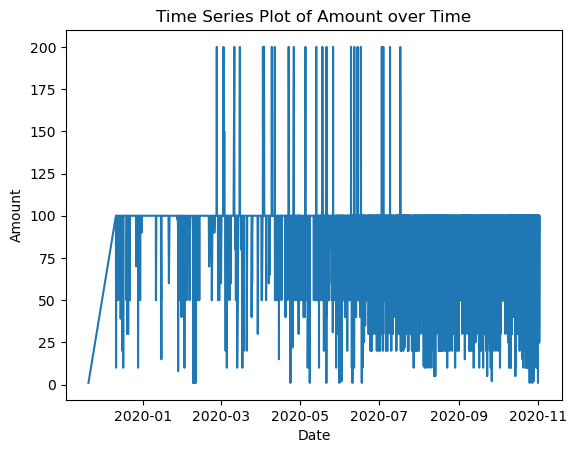

'# Correlation matrix\ncorrelation_matrix = float(merged_cashrequest_fees.corr())\nplt.figure(figsize=(10, 8))\nsns.heatmap(correlation_matrix, annot=True, cmap=\'coolwarm\', fmt=".2f")\nplt.title(\'Correlation Matrix\')\nplt.show()'

In [18]:

# Summary Statistics
summary_stats = merged_cashrequest_fees.describe()
print(summary_stats)

# Data Visualization

# Distribution of numerical variables
numerical_cols = merged_cashrequest_fees.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    sns.histplot(merged_cashrequest_fees[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

#Useless graphs


# Scatter plot for relationship exploration

sns.scatterplot(x='amount', y='id_x', data=merged_cashrequest_fees)
plt.title('Scatter Plot of Amount vs. User ID')
plt.xlabel('Amount')
plt.ylabel('User ID')
plt.show()

# Box plot for outlier detection

sns.boxplot(x='status_x', y='amount', data=merged_cashrequest_fees)
plt.title('Box Plot of Amount by Status')
plt.xlabel('Status')
plt.ylabel('Amount')
plt.show()


# Time Series Analysis
df['created_at_x'] = pd.to_datetime(merged_cashrequest_fees['created_at_x'])

sns.lineplot(x='created_at_x', y='amount', data=merged_cashrequest_fees)
plt.title('Time Series Plot of Amount over Time')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.show()

"""# Correlation matrix
correlation_matrix = float(merged_cashrequest_fees.corr())
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()"""


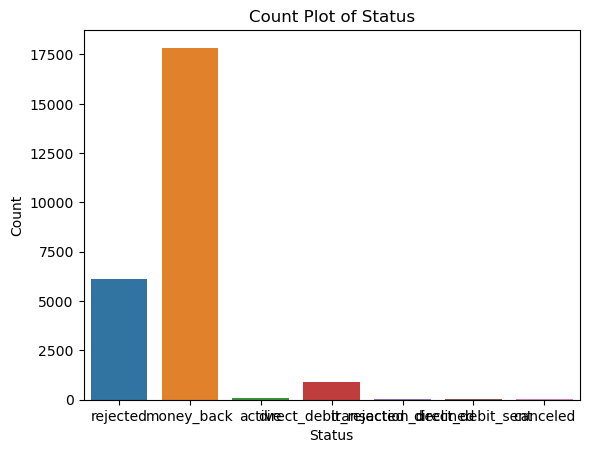

In [17]:
# Categorical analysis
sns.countplot(x='status_x', data=merged_cashrequest_fees)
plt.title('Count Plot of Status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

c:\Users\adria\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\adria\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


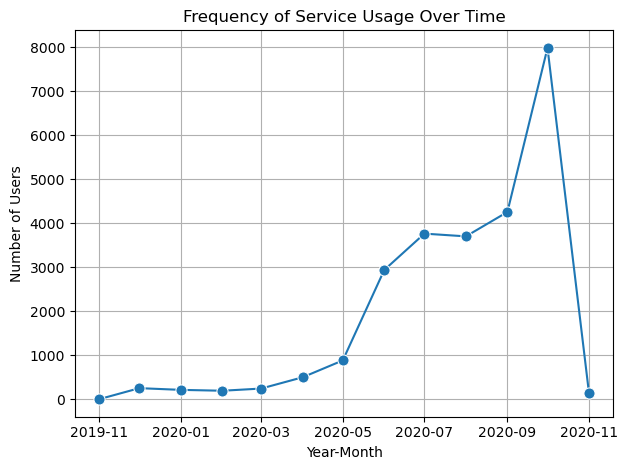

In [16]:

# Convert 'cohort_x' to datetime
merged_cashrequest_fees['cohort_x'] = pd.to_datetime(merged_cashrequest_fees['cohort_x'])

# Extract year and month from 'cohort_x'
merged_cashrequest_fees['year_month'] = merged_cashrequest_fees['cohort_x'].dt.to_period('M')

# Group by 'year_month' and count the occurrences of 'user_id'
usage_frequency = merged_cashrequest_fees.groupby('year_month')['user_id'].count()

# Reset index to convert 'year_month' from index to column
usage_frequency_reset = usage_frequency.reset_index()

# Convert 'year_month' to Timestamp format
usage_frequency_reset['year_month'] = usage_frequency_reset['year_month'].dt.to_timestamp()

# Plot

sns.lineplot(data=usage_frequency_reset, x='year_month', y='user_id', marker='o', markersize=8)
plt.title('Frequency of Service Usage Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Users')
plt.grid(True)
plt.tight_layout()





In [11]:
print(usage_frequency.head(5))
print(usage_frequency_reset.head())

year_month
2019-11      1
2019-12    251
2020-01    212
2020-02    192
2020-03    242
Freq: M, Name: user_id, dtype: int64
  year_month  user_id
0 2019-11-01        1
1 2019-12-01      251
2 2020-01-01      212
3 2020-02-01      192
4 2020-03-01      242


C:\Users\adria\AppData\Local\Temp\ipykernel_25052\3189871694.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  revenue_by_cohort = merged_cashrequest_fees.groupby(['cohort_x', merged_cashrequest_fees['created_at_x'].dt.to_period('M')])['total_amount'].sum()
c:\Users\adria\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


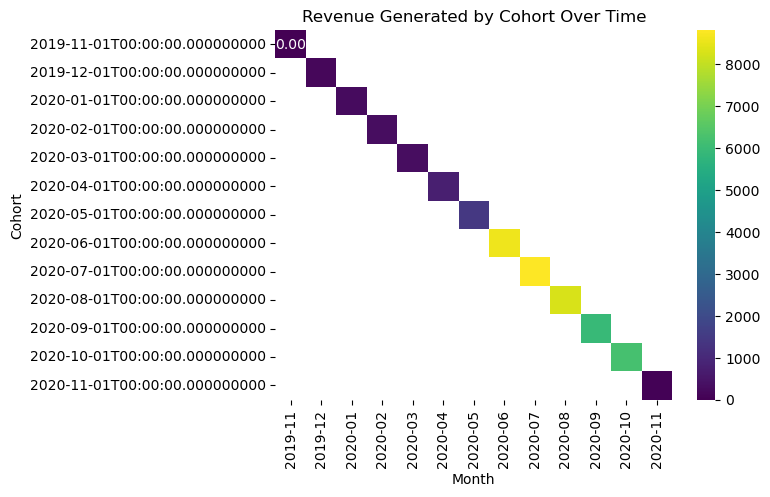

In [15]:
# Group by both cohort and transaction month, then sum up the revenue
revenue_by_cohort = merged_cashrequest_fees.groupby(['cohort_x', merged_cashrequest_fees['created_at_x'].dt.to_period('M')])['total_amount'].sum()

# Reset index to convert multi-index to columns
revenue_by_cohort_reset = revenue_by_cohort.reset_index()

# Pivot the data to have cohorts as rows, months as columns, and revenue as values
revenue_pivot = revenue_by_cohort_reset.pivot(index='cohort_x', columns='created_at_x', values='total_amount')

# Plot

sns.heatmap(revenue_pivot, cmap='viridis', annot=True, fmt='.2f')
plt.title('Revenue Generated by Cohort Over Time')
plt.xlabel('Month')
plt.ylabel('Cohort')
plt.show()


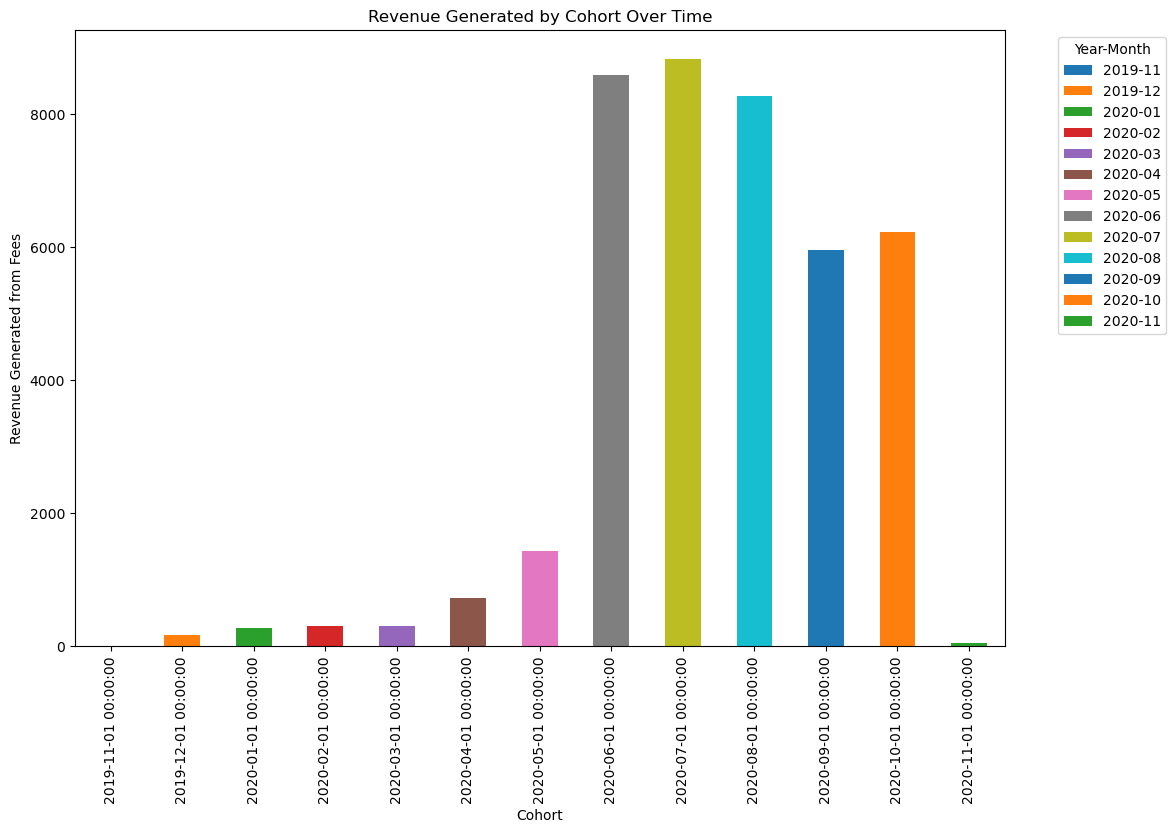

In [13]:
# Group by 'cohort_x' and 'year_month' and sum the revenue generated from fees
revenue_by_cohort = merged_cashrequest_fees.groupby(['cohort_x', 'year_month'])['total_amount'].sum().reset_index()

# Pivot the data to have 'year_month' as columns and 'cohort_x' as rows
revenue_pivot = revenue_by_cohort.pivot(index='cohort_x', columns='year_month', values="total_amount")

# Plot the bar chart
revenue_pivot.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Revenue Generated by Cohort Over Time')
plt.xlabel('Cohort')
plt.ylabel('Revenue Generated from Fees')
plt.legend(title='Year-Month', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [14]:


"""
# 5. Relationships Between Variables
# Correlation matrix
correlation_matrix = merged_cashrequest_fee.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()"""
#Figure out how to make it work




"\n# 5. Relationships Between Variables\n# Correlation matrix\ncorrelation_matrix = merged_cashrequest_fee.corr()\nsns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')\nplt.title('Correlation Matrix')\nplt.show()"